## Векторная модель текста в NLTK
### Задание 1
Возьмем файл alice.txt с прошлого семинара. Мы уже научились разбивать его на токены и удалять стоп-слова.
Используя nltk.FreqDist, выведите 20 самых часто встречающихся слов в тексте (не удаляя стоп символы).

Ответьте на вопросы:

    Какое слово стоит на 1 месте?
    Сколько раз встречается слово, стоящее на 20 месте?
    Сколько не стоп-слов среди первых десяти?
    Сколько раз встречается слово "крокет"? (понятно, что оно не входит в top20)


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
Mounted at /content/drive


In [17]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
with open('alice.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [0]:
words = word_tokenize(text)

In [0]:
dct = nltk.FreqDist(words)

In [53]:
[elem[0] for elem in dct.most_common(20)]

[',',
 '–',
 '.',
 'и',
 '!',
 'не',
 'Алиса',
 'в',
 'что',
 'она',
 'на',
 '?',
 'с',
 'я',
 ':',
 'как',
 'все',
 'это',
 'А',
 'сказала']

In [54]:
dct.most_common(1)[0][0]

','

In [55]:
dct.most_common(20)[-1][1]

123

In [0]:
rus_stopwords = stopwords.words('russian')

In [57]:
not_stopwords = [elem[0] for elem in dct.most_common(10) if elem[0] not in rus_stopwords]
print(not_stopwords, len(not_stopwords))

[',', '–', '.', '!', 'Алиса'] 5


In [58]:
word = 'крокет'
dct[word], dct.freq(word)

(6, 0.000219514872132587)

### Задание 2
Избавьтесь от стоп-слов с помощью списка stopwords из nltk.corpus. Используйте pymorphy2 или Mystem, чтобы привести слова к нормальной форме. Ответьте на вопросы:

    Какое слово стоит на 1 месте?
    Сколько раз встречается слово, стоящее на 20 месте?
    Остались ли какие-то стоп-слова среди первых 10? 20?
    Сколько раз встречается слово "крокет"? Почему результат изменился?


In [59]:
!pip install pymorphy2
import pymorphy2
from string import punctuation
morph = pymorphy2.MorphAnalyzer()
l3 = [morph.parse(token)[0].normal_form for token in words if morph.parse(token)[0].normal_form not in (rus_stopwords + list(punctuation))]

In [0]:
dct = nltk.FreqDist(l3)

In [61]:
dct.most_common(1)[0][0]

'–'

In [62]:
dct.most_common(20)[-1][1]

51

In [63]:
dct.most_common(20)

[('–', 1936),
 ('алиса', 417),
 ('сказать', 257),
 ('это', 231),
 ('весь', 222),
 ('мочь', 89),
 ('спросить', 78),
 ('«', 76),
 ('»', 76),
 ('королева', 75),
 ('подумать', 73),
 ('свой', 68),
 ('король', 65),
 ('очень', 64),
 ('болванщик', 60),
 ('голова', 58),
 ('грифон', 57),
 ('квази', 53),
 ('рука', 51),
 ('кролик', 51)]

In [64]:
word = 'крокет'
dct[word], dct.freq(word)

(8, 0.0005683836589698046)

Давайте пострим кумулятивный график частот слов. Как он выглядит и почему так? Попробуйте поменять количество слов, какие тенденции вы видите?


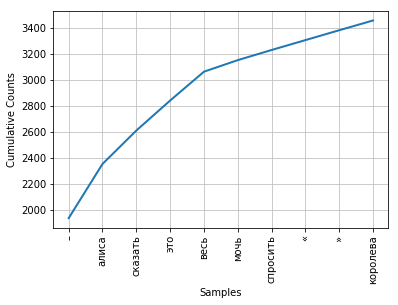

In [65]:
dct.plot(10, cumulative=True)

### Задание 3

Найдите распределение длин слов в тексте, выведите top5 и ответьте на вопросы:

    Сколько всего в данном тексте вариантов длин слов (вместе со стоп-словами)?
    Слов какой длины в тексте больше всего?
    Какую долю занимают слова этой длины?
    Сколько слов длины 1?

Выведите в алфавитном поредке длинные слова (длиннее 15 символов).

    Сколько их?

In [0]:
from collections import Counter
cntr = Counter([len(word) for word in l3])

In [70]:
cntr.most_common(5)

[(1, 2119), (5, 2101), (6, 1952), (7, 1764), (8, 1461)]

In [71]:
len(cntr)

17

In [73]:
cntr.most_common(1)[0][0]

1

In [75]:
fdist = nltk.FreqDist(len(w) for w in l3)
print(fdist)

<FreqDist with 17 samples and 14075 outcomes>


In [81]:
fdist.most_common(5), fdist.max(), fdist.most_common(1)[0][1], fdist.freq(fdist.max())

([(1, 2119), (5, 2101), (6, 1952), (7, 1764), (8, 1461)],
 1,
 2119,
 0.150550621669627)

In [86]:
long_words = [w for w in l3 if len(w) > 15]
sorted(long_words), len(long_words)

(['многозначительно', 'несправедливости…', 'поинтересоваться'], 3)

### Задание 4

Превратите строку в NLTK-текст и проверьте, как работают спецфункции, на собственных примерах.


In [94]:
text = nltk.Text(l3)
print(text.concordance("алиса", 79, 20))

Displaying 20 of 417 matches:
вечерний луч смягчить дневный краска алиса сказка детский день хранить седина т
ка разговор – толк книжка – подумать алиса – картинка разговор сидеть размышлят
й карман взглянуть помчаться далёкий алиса вскочить нога осенить ранний видеть 
ь заметить юркнуть нора изгородь миг алиса юркнуть следом думать выбираться обр
ннель круто обрываться вниз 6 успеть алиса глаз моргнуть начало падать словно г
 апельсиновый » увы оказаться пустой алиса побояться бросить банка вниз – убить
каф 7 – это упасть упасть – подумать алиса – упасть лестница пара пустяк наш ре
сно сколько миля пролететь – сказать алиса вслух – верно приближаться центр зем
коло четыре тысяча миля вниз… видеть алиса выучить кое-что это род урок классны
 удержаться – верно оно – продолжать алиса – интересно широта долгота сказать п
ать падать делать нечего – помолчать алиса снова заговорить – дин сегодня весь 
ошка отбавлять интересно кошка мошка алиса почувствовать глаз нея слипаться сон
ошка нея п

In [99]:
print(text.similar('ожидать'))

хватать
None


In [110]:
print(text.common_contexts(["зал", "ключик"]))

No common contexts were found
None


In [106]:
print(text.collocations(30))

черепаха квази; мартовский заяц; белый кролик; весь равно; подумать
алиса; ваш величество; сказать алиса; никак мочь; всякий случай;
немного спустя; сказать король; спросить алиса; мораль отсюда; отсюда
таков; блаженная еда; блаже-э-нный е-да-; еда вечерний; отвечать
алиса; подзорный труба; стеклянный столик; гав гав; скрестить грудь;
золотой ключик; убить время; позволение ваш; ходить школа; папа
вильям; робин гусь; надеть очки; отрубить голова
None


## Эмбеддинги


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from sklearn.metrics import *
from sklearn.feature_extraction.text import *
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')
random.seed(1228)

%matplotlib inline

Скачиваем куски датасета твитов ([источник](http://study.mokoron.com/)): [положительные](https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0), [отрицательные](https://www.dropbox.com/s/ilkte35m35l38mr/negative.sql).

In [112]:
!wget https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0

--2019-05-29 16:49:38--  https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/fnpq3z4bcnoktiv/positive.csv [following]
--2019-05-29 16:49:39--  https://www.dropbox.com/s/raw/fnpq3z4bcnoktiv/positive.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfeb9ec0081b1da36dc3468d270.dl.dropboxusercontent.com/cd/0/inline/Ah2kp6T0mGlG1m8bCFABEq3MXD3GBsqNLW-KrMSgx3zyHZI79eI4NWrb7_FxGHcapQbTiW90qZ_U-vNKEhbxqw-c58nStXdrmrLE5EP5OXtYIQ/file# [following]
--2019-05-29 16:49:39--  https://ucfeb9ec0081b1da36dc3468d270.dl.dropboxusercontent.com/cd/0/inline/Ah2kp6T0mGlG1m8bCFABEq3MXD3GBsqNLW-KrMSgx3zyHZI79eI4NWrb7_FxGHcapQbTiW90qZ_U-vNKEhbxqw-c58nStXdrmrLE5EP5OXtYIQ/file
Resolving u

In [113]:
!wget https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv?dl=0

--2019-05-29 16:49:43--  https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/r6u59ljhhjdg6j0/negative.csv [following]
--2019-05-29 16:49:44--  https://www.dropbox.com/s/raw/r6u59ljhhjdg6j0/negative.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf5b60869e02c57c840520f4184.dl.dropboxusercontent.com/cd/0/inline/Ah3yNrQITgrkkaS-GwgpZaiFBe4s_LERvK93NjXy9lyjHN93pMG2kSLhm4NUWo8zv_uD59p_VKggnM_UqbtEK15of68-KgMm5Hoat1jYOTqbVQ/file# [following]
--2019-05-29 16:49:44--  https://ucf5b60869e02c57c840520f4184.dl.dropboxusercontent.com/cd/0/inline/Ah3yNrQITgrkkaS-GwgpZaiFBe4s_LERvK93NjXy9lyjHN93pMG2kSLhm4NUWo8zv_uD59p_VKggnM_UqbtEK15of68-KgMm5Hoat1jYOTqbVQ/file
Resolving u

Загружаем лемматизированные статьи без стоп-слов и создаем массив текстов

In [0]:
from pymystem3 import Mystem
import re

m = Mystem()

regex = re.compile("[А-Яа-я:=!\)\()A-z\_\%/|]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

In [120]:
df_neg = pd.read_csv("negative.csv?dl=0", sep=';', header = None, usecols = [3])
df_pos = pd.read_csv("positive.csv?dl=0", sep=';', header = None, usecols = [3])
df_neg['sent'] = 'neg'
df_pos['sent'] = 'pos'
df_pos['text'] = df_pos[3]
df_neg['text'] = df_neg[3]
df = pd.concat([df_neg, df_pos])
df = df[['text', 'sent']]
%time df.text = df.text.apply(words_only)
%time df.text = df.text.apply(lemmatize)

CPU times: user 1.06 s, sys: 22.1 ms, total: 1.09 s
Wall time: 1.09 s
CPU times: user 1min 8s, sys: 48.1 s, total: 1min 56s
Wall time: 1min 57s


In [0]:
print(df.shape)
df.head()

In [0]:
df.tail()

In [0]:
texts = [df.text.iloc[i].split() for i in range(len(df))]

### Обучение модели в gensim

In [0]:
texts[0]

In [0]:
%%time
from gensim.models import Word2Vec
model = Word2Vec(texts, size=100, window=5, min_count=5, workers=4)
model.save("word2v.model")

In [0]:
# здесь можно посмотреть все слова, к которым мы имеем вектора
# model.vocab

Загружаем обученную модель (для скорости):

In [0]:
# from gensim.models import Word2Vec
# model = Word2Vec.load("sent_w2v.model")

Теперь можно воспользjваться функциями поиска похожих / непохожих слов на данное

    model.most_similar
    model.doesnt_match
    etc

In [0]:
model.most_similar("корпоратив")

In [0]:
model.most_similar(positive=["король","добрый"], negative=["хороший"])

In [0]:
model.doesnt_match("борщ сметана макароны пирожок котлета".split())

### Задание 5
Выделите top 100 самых частотных слов и получите для них только что обученные вектора

In [0]:
from nltk import FreqDist

fd = FreqDist()
# your code is hear

top_words = # your code is hear

In [0]:
model['рабочий']

In [0]:
top_words_vec = # your code is hear

Визуализируем вектора. Для этого воспользуемся методом снижения размерности t-sne

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
top_words_tsne = tsne.fit_transform(top_words_vec)

In [0]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="word2vec T-SNE for most common words")

source = ColumnDataSource(data=dict(x1=top_words_tsne[:,0],
                                    x2=top_words_tsne[:,1],
                                    names=top_words))

p.scatter(x="x1", y="x2", size=8, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)

Теперь нарисуем облако слов

In [0]:
from wordcloud import *
word_freq = [i for i in fd.most_common(100)]
wd = WordCloud(background_color = 'white')
wd.generate_from_frequencies(dict(word_freq))
plt.figure()
plt.imshow(wd, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Кластеризация слов

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(top_words_vec)

In [0]:
from scipy.cluster.hierarchy import  ward, dendrogram

linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(10, 100)) 
ax = dendrogram(linkage_matrix, orientation="right", labels=top_words);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() 

plt.savefig('w2v_cluster.png', dpi=200) #save figure as ward_clusters

## Языковые модели

### Модели биграм в NLTK

In [0]:
import nltk

In [125]:
names = [name.strip().lower() for name in open('dinos.txt').readlines()]
print(names[:10])

['aachenosaurus', 'aardonyx', 'abdallahsaurus', 'abelisaurus', 'abrictosaurus', 'abrosaurus', 'abydosaurus', 'acanthopholis', 'achelousaurus', 'acheroraptor']


In [126]:
chars = [char for name in names for char in name]
freq = nltk.FreqDist(chars)

print(list(freq.keys()))

['a', 'c', 'h', 'e', 'n', 'o', 's', 'u', 'r', 'd', 'y', 'x', 'b', 'l', 'i', 't', 'p', 'v', 'm', 'g', 'f', 'j', 'k', 'w', 'z', 'q']


In [128]:
cfreq = nltk.ConditionalFreqDist(nltk.bigrams(chars))
print(cfreq['a'])

<FreqDist with 26 samples and 2487 outcomes>


In [129]:
cprob = nltk.ConditionalProbDist(cfreq, nltk.MLEProbDist)
print('p(a a) = %1.4f' %cprob['a'].prob('a'))
print('p(a b) = %1.4f' %cprob['a'].prob('b'))
print('p(a u) = %1.4f' %cprob['a'].prob('u'))

p(a a) = 0.0105
p(a b) = 0.0129
p(a u) = 0.3185


In [130]:
l = sum([freq[char] for char in freq])
def unigram_prob(char):
    return freq[char] / l
print('p(a) = %1.4f' %unigram_prob('a'))

p(a) = 0.1354


In [131]:
# можно порождать случайные символы с учётом предыдущих 
cprob['a'].generate()

'u'

### Рекуррентные нейронные языковые модели

In [0]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
import pdb
from torch.utils.data import Dataset, DataLoader

%load_ext autoreload
%autoreload 2

torch.set_printoptions(linewidth=200)

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
hidden_size = 50

In [0]:
class DinosDataset(Dataset):
    def __init__(self):
        super().__init__()
        with open('dinos.txt') as f:
            content = f.read().lower()
            self.vocab = sorted(set(content))
            self.vocab_size = len(self.vocab)
            self.lines = content.splitlines()
        self.ch_to_idx = {c:i for i, c in enumerate(self.vocab)}
        self.idx_to_ch = {i:c for i, c in enumerate(self.vocab)}
    
    def __getitem__(self, index):
        line = self.lines[index]
        # teacher forcing
        x_str = line
        y_str = line[1:] + '\n'
        x = torch.zeros([len(x_str), self.vocab_size], dtype=torch.float)
        y = torch.empty(len(x_str), dtype=torch.long)
        for i, (x_ch, y_ch) in enumerate(zip(x_str, y_str)):
            x[i][self.ch_to_idx[x_ch]] = 1
            y[i] = self.ch_to_idx[y_ch]
        
        return x, y
    
    def __len__(self):
        return len(self.lines)

In [0]:
trn_ds = DinosDataset()
trn_dl = DataLoader(trn_ds, shuffle=True)

In [136]:
print(trn_ds.lines[1])

aardonyx


In [137]:
print(trn_ds.ch_to_idx)

{'\n': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [138]:
x, y = trn_ds[1]
print(x)
print(y)

tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])
tensor([ 1, 18,  4, 15, 14, 25, 24,  0])


In [0]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.dropout = nn.Dropout(0.3)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)

    def forward(self, h_prev, x):
        combined = torch.cat([h_prev, x], dim = 1) # конкатенируем вектора состояния и входа
        h = torch.tanh(self.dropout(self.i2h(combined)))
        y = self.i2o(combined)
        return h, y

In [0]:
model = RNN(trn_ds.vocab_size, hidden_size, trn_ds.vocab_size).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

In [0]:
def print_sample(sample_idxs):
    [print(trn_ds.idx_to_ch[x], end='') for x in sample_idxs]

In [0]:
def sample(model):
    model.eval()
    word_size=0
    newline_idx = trn_ds.ch_to_idx['\n']
    with torch.no_grad():
        h_prev = torch.zeros([1, hidden_size], dtype=torch.float, device=device)
        x = h_prev.new_zeros([1, trn_ds.vocab_size])
        start_char_idx = random.randint(1, trn_ds.vocab_size-1)
        indices = [start_char_idx]
        x[0, start_char_idx] = 1
        predicted_char_idx = start_char_idx
        
        while predicted_char_idx != newline_idx and word_size != 50:
            h_prev, y_pred = model(h_prev, x)
            y_softmax_scores = torch.softmax(y_pred, dim=1)

            np.random.seed(np.random.randint(1, 5000))
            idx = np.random.choice(np.arange(trn_ds.vocab_size), p=y_softmax_scores.cpu().numpy().ravel())
            indices.append(idx)

            x = (y_pred == y_pred.max(1)[0]).float()
            predicted_char_idx = idx
            
            word_size += 1
        
        if word_size == 50:
            indices.append(newline_idx)
    return indices

In [0]:
def train_one_epoch(model, loss_fn, optimizer):
    model.train()
    for line_num, (x, y) in enumerate(trn_dl):
        loss = 0
        optimizer.zero_grad()
        h_prev = torch.zeros([1, hidden_size], dtype=torch.float, device=device)
        x, y = x.to(device), y.to(device)
        for i in range(x.shape[1]):
            h_prev, y_pred = model(h_prev, x[:, i])
            loss += loss_fn(y_pred, y[:, i])
            
        if (line_num+1) % 100 == 0:
            print_sample(sample(model))
        loss.backward()
        optimizer.step()

In [0]:
def train(model, loss_fn, optimizer, dataset='dinos', epochs=1):
    for e in range(1, epochs+1):
        print('Epoch:{}'.format(e))
        train_one_epoch(model, loss_fn, optimizer)
        print()

In [148]:
train(model, loss_fn, optimizer, epochs=5)

Epoch:1
zrtansaurus
itacoraurus
fasaruuros
vonbtopysnus
dangananrus
qariahnaurus
zhuoudoosaurus
oseptoi
kicgtaurus
fupapdsaurus
munuashurus
qiynishurus
penaperapop
fleungchurus
cerpthesiusus

Epoch:2
notanasrus
pgsaeos
salrnparaatmur
souioseurus
osobsol
kucomo
lariaraurus
ocextoroxors
topytosaulus
marcono
batibaurus
yuaitnsasiurus
dmvsiporaaurus
mojtaasoaaurus
ruchyrshtor

Epoch:3
qernkvkurus
beralodaurus
apaolnrrls
antus
ruttolosaurus
vraipauros
yuabsobaurus
ruchysiurus
xinonyurus
zangaes
yulyagaulus
xigbsansurus
eridosaurus
us
nimanhnrus

Epoch:4
nasacrus
qiasaitit
xoropaurus
opostar
haltasgtbaurds
ushl
quanvosaurus
atrivthsaurus
haraoataasagrus
becscktaurus
ligkonturus
sanrapirrus
cercbonaurps
meuoueosaurus
suuksourus

Epoch:5
qirbsnkgrus
chlonocherus
hapsqneosaurus
yuagodaurus
iagonaaurus
trcgyrpurus
alrusuurus
tapcchsaurus
vinaresaurus
iunsauturus
xiyskshurus
ulsaoniurus
nicoenargaurus
qurnesossurus
xagnchsaurus



### Использование LSTM нейронов

In [0]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.linear_f = nn.Linear(input_size + hidden_size, hidden_size)
        self.linear_u = nn.Linear(input_size + hidden_size, hidden_size)
        self.linear_c = nn.Linear(input_size + hidden_size, hidden_size)
        self.linear_o = nn.Linear(input_size + hidden_size, hidden_size)
        
        self.i2o = nn.Linear(hidden_size, output_size)
        
    def forward(self, c_prev, h_prev, x):
        combined = torch.cat([x, h_prev], 1)
        f = torch.sigmoid(self.linear_f(combined))
        u = torch.sigmoid(self.linear_u(combined))
        c_tilde = torch.tanh(self.linear_c(combined))
        c = f*c_prev + u*c_tilde
        o = torch.sigmoid(self.linear_o(combined))
        h = o*torch.tanh(c)
        y = self.i2o(h)

        return c, h, y

In [0]:
model = LSTM(trn_ds.vocab_size, hidden_size, trn_ds.vocab_size).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-2)

In [0]:
def sample(model):
    model.eval()
    with torch.no_grad():
        c_prev = torch.zeros([1, hidden_size], dtype=torch.float, device=device)
        h_prev = torch.zeros_like(c_prev)
        idx = random.randint(1, 26)
        x = c_prev.new_zeros([1, trn_ds.vocab_size])
        x[0, idx] = 1
        sampled_indexes = [idx]
        n_chars = 1
        newline_char_idx = trn_ds.ch_to_idx['\n']
        while n_chars != 50 and idx != newline_char_idx:
            c_prev, h_prev, y_pred = model(c_prev, h_prev, x)
            
            np.random.seed(np.random.randint(1, 5000))
            idx = np.random.choice(np.arange(trn_ds.vocab_size), p=torch.softmax(y_pred, 1).cpu().numpy().ravel())
            sampled_indexes.append(idx)
            
            x = (y_pred == y_pred.max(1)[0]).float()
            
            n_chars += 1
            
            if n_chars == 50:
                sampled_indexes.append(newline_char_idx)
                
    model.train()
    return sampled_indexes

In [0]:
def train_one_epoch(model, loss_fn, optimizer):
    model.train()
    for line_num, (x, y) in enumerate(trn_dl):
        loss = 0
        optimizer.zero_grad()
        c_prev = torch.zeros([1, hidden_size], dtype=torch.float, device=device)
        h_prev = torch.zeros_like(c_prev)
        x, y = x.to(device), y.to(device)
        for i in range(x.shape[1]):
            c_prev, h_prev, y_pred = model(c_prev, h_prev, x[:, i])
            loss += loss_fn(y_pred, y[:, i])
            
        if (line_num+1) % 100 == 0:
            print_sample(sample(model))
        loss.backward()
        optimizer.step()

In [153]:
train(model, loss_fn, optimizer, epochs=5)

Epoch:1
srrarrgrr
jtciuot
bstsraurus
xisrtaurus
latgucauris
uscnasaurus
motsmlaurus
wlstanacrus
sbudesadrus
cectbitaurus
enesaurus
stubonanaurus
ofpucus
kelasaurus
osssaurus

Epoch:2
humopsaurus
ocmurus
pianesmaurus
kotaptsaurus
rtlorsaisaurus
bubaoo
eoathrathpturus
esklssaurus
xpaglano
kultalsaurus
ilasaurus
eusopaurus
diroyairaurus
mtbcsasrus
qiarapturus

Epoch:3
noogqunysaurus
xiagscauros
klaibsia
isarturas
yungrsaurus
nuagjanocaurus
we
plotonaurus
juanssraurus
antrsaptir
gareuedaurus
belataurus
brtrnhsaurus
eutaoaurus
retahsactor

Epoch:4
tectaosaurus
migssaurus
braenanaurus
icplbaurus
eucmtthosaurus
miutosaurus
maraomu
kasiaaurus
euchysuurus
larolvaurus
henchsaurus
yunaonaurus
peuougrsaurus
dysisiurus
dasathucaurus

Epoch:5
zuindsdaurus
virkdaurus
huruajhrrus
tesacaurus
algasaurus
astrrattor
girpsaaurus
yuatagaurus
rhcaucotaurus
zhangkxaurus
jickguasaurus
wangtnaurus
ersespurus
pewofospurus
ziangycauras



### Задание 8

Написать функцию get_prob(), оценивающую веростность порождения одной строки (из файла) и найти самую вероятную строку, порождаемую каждой из трех языковых моделей.

### Задание 9

Используя функцию get_prob(), написать функцию perplexety, оценивающую перплексию каждой из трех языковых моделей.

### Задание 10

Добавить в функцию сэмплирования возможность использовать т.н. температуру. Сейчас сэмплирование следующего символа осуществляется с использованием np.random.choice, где вероятность каждого символа получена на выходе из softmax:

p=torch.softmax(y_pred, 1).cpu().numpy().ravel().

Температура сэмплирования определяется параметром $T$ и преобразует вероятности следующим образом: $p_i = \frac{p_i^{1/T}}{\sum_j p_j^{1/T}}$ .

Проведите эксперименты с разными значениями $T \in [0.5, 1, 2]$. Как разные значения $T$ влияют на генерируемые строки?

### Задание 11

Реализуйте beam search для генерации строк.